In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
#transfor the file in DataFrame
df = pd.read_csv("C:/Users/pedro/Documents/GitHub/IronHackLabs/Week2/Data_Marketing_Customer_Analysis_Round3.csv")



In [ ]:
#Separate the numerical values
df_n = df.select_dtypes(include=[np.number])
df_n

In [ ]:
##check if there are highly correlated features and drop them if there are any.
plt.figure(figsize=(10,10))
cor = df_n.corr()
sns.heatmap(cor,annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [ ]:
#Create the categorical DataFrame.
df2 = df.select_dtypes(include='object')
#Date is not an object
df2.drop('effective_to_date', axis=1, inplace=True)
#separing ordinal and nominals
df3 = df[['region','response', 'gender', 'marital_status', 'employment_status', 'sales_channel', 'vehicle_class', 'policy_type']].copy()
df4 = df[['coverage', 'education', 'month', 'policy', 'renew_offer_type', 'vehicle_size']].copy()

In [ ]:
#dummies for the nominals
df3_hot = pd.get_dummies(df3)
df3_hot

In [ ]:
df4

In [ ]:
#create a hierarchy for the values
mapper = {'basic': 0, 'extended': 1, 'premium': 2, 'high school or below': 0, 'bachelor': 1, 'college': 2, 'master': 3, 'doctor': 4, 'jan': 0, 'feb': 1, 'small': 0, 'medsize': 1, 'large': 2, 'corporate l3': 6, 'personal l3': 3, 'personal l2': 2, 'corporate l2': 5,'personal l1': 1, 'special l1': 7, 'corporate l1': 4, 'special l3': 9,
'special l2': 8}
#add new columns
df4['coverage_value'] = df4['coverage'].replace(mapper)
df4['education_value'] = df4['education'].replace(mapper)
df4['month_value'] = df4['month'].replace(mapper)
df4['policy_value'] = df4['policy'].replace(mapper)
df4['renew_offer_type_value'] = df4['renew_offer_type'].replace(mapper)
df4['vehicle_size_value'] = df4['vehicle_size'].replace(mapper)
df4


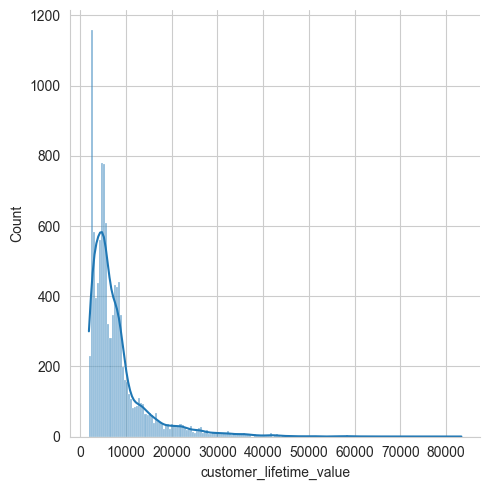

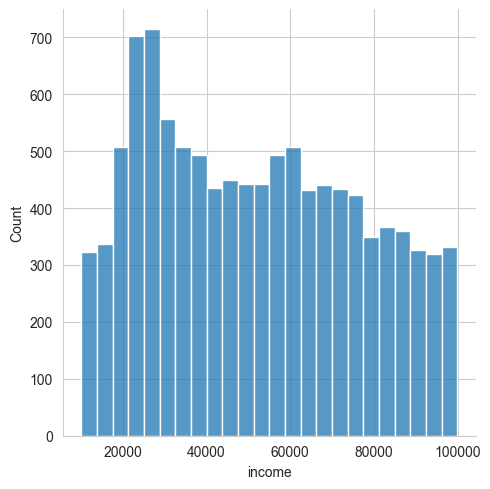

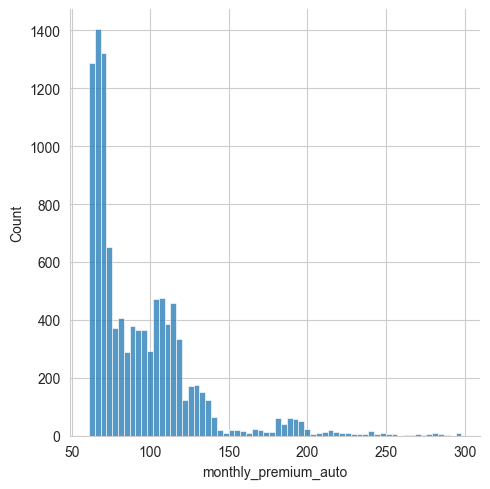

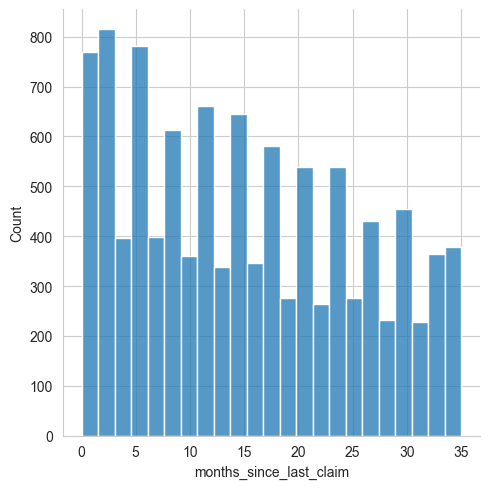

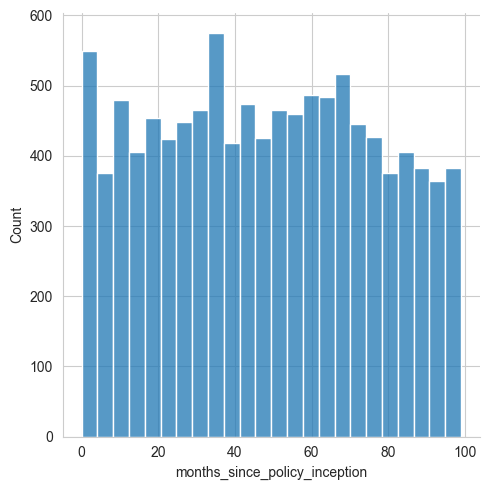

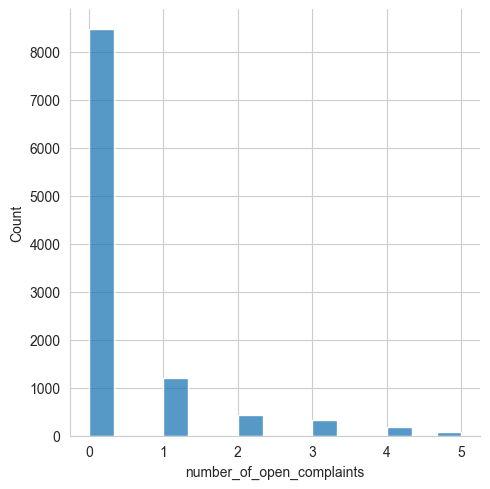

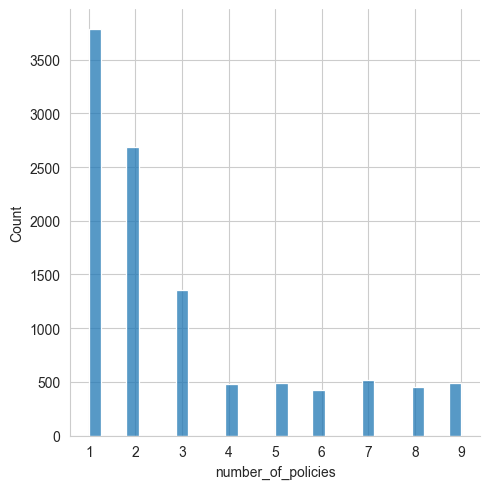

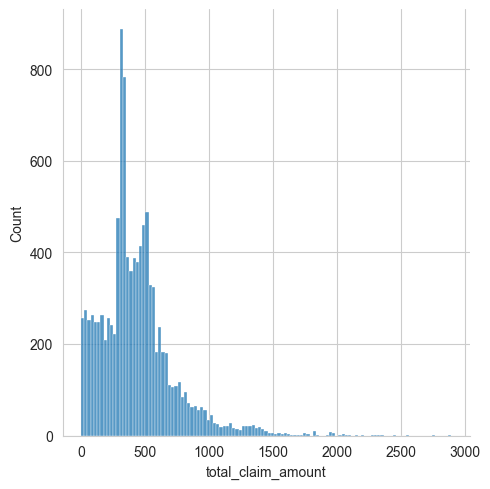

In [22]:
#Checking the normal distributyion of the numerical columns
import numpy as np
df5 = df.select_dtypes(include = 'number')
customer_lifetime_value = sns.displot(df['customer_lifetime_value'], kde=True)
income = sns.displot(df['income'])
monthly_premium_auto = sns.displot(df, x= 'monthly_premium_auto')
months_since_last_claim = sns.displot(df, x= 'months_since_last_claim')
months_since_policy_inception = sns.displot(df, x= 'months_since_policy_inception')
number_of_open_complaints = sns.displot(df, x= 'number_of_open_complaints')
number_of_policies = sns.displot(df, x= 'number_of_policies')
total_claim_amount = sns.displot(df, x= 'total_claim_amount')

In [27]:
df['income']

0        48029
1        92260
2        22139
3        49078
4        23675
         ...  
10684    61541
10685    61146
10686    39837
10687    64195
10688    68942
Name: income, Length: 10689, dtype: int64

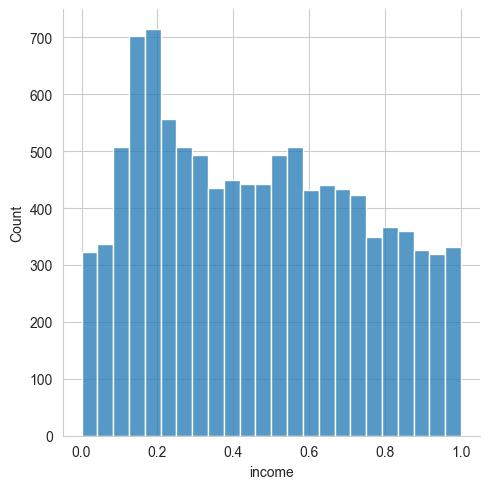

In [31]:
#Use minmax transform to bring varAs values into the range [0,1].
from sklearn.preprocessing import MinMaxScaler
varA = df[['income']]
scaler = MinMaxScaler()
df5[['income']] = scaler.fit_transform(varA)
#Check that varA has been rescaled using a distplot or a histagram
sns.displot(df5, x='income')

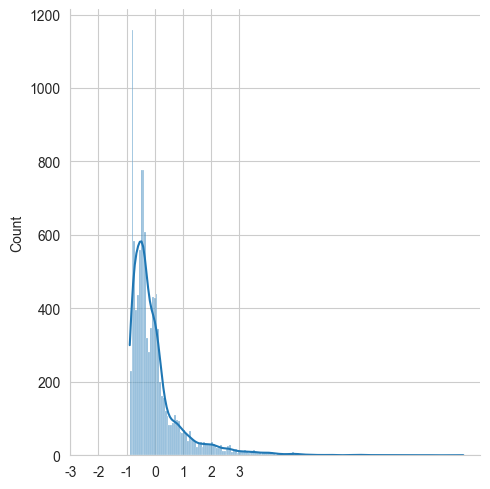

In [34]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
#Define VarB
varB = df[['customer_lifetime_value']]
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(varB)
sns.displot(np.squeeze(scaled), kde=True)
plt.xticks(np.arange(-3, 4), labels=np.arange(-3, 4))
plt.show()


In [ ]:
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(varB)
scaled = np.reshape(scaled, (-1, 1 ))
plt.hist(scaled, bins=25)
plt.show()